In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [24]:
def bloch_solver(y, t, omega_bar):
    """
    Defines the coupled ODEs for the scaled Bloch equations.
    y[0] = p_r (Real Polarization)
    y[1] = p_i (Imaginary Polarization)
    y[2] = D   (Inversion)
    """
    pr, pi, D = y

    # Derivatives based on the derived scaled equations
    dpr_dt = -pr
    dpi_dt = -pi - omega_bar * D
    dD_dt  = -2 * (1 + D) + 4 * omega_bar * pi

    return [dpr_dt, dpi_dt, dD_dt]

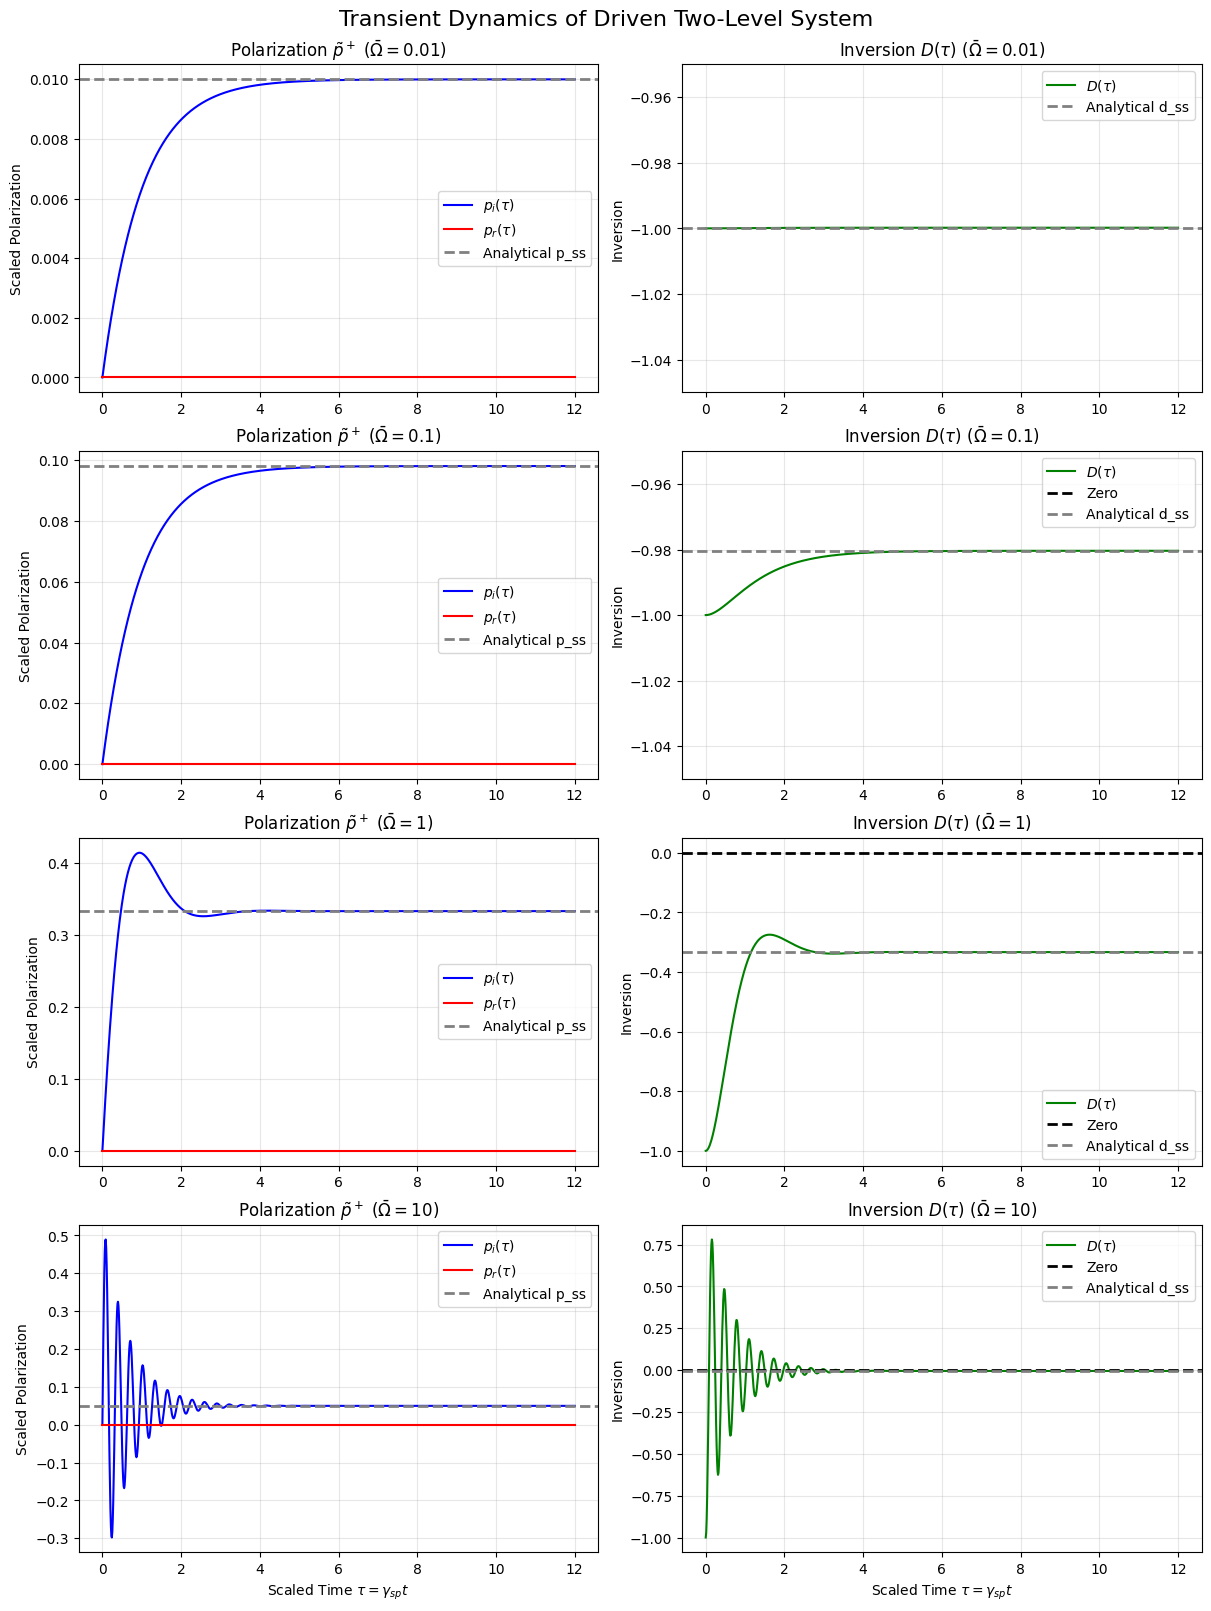

In [26]:
ratios = [0.01, 0.1, 1, 10]  # Omega_R / gamma_sp


# Time array: Scaled time tau = gamma_sp * t
t = np.linspace(0, 12, 1000)

# Atom in lower level -> Inversion D = -1
# Polarization is initially zero.
y0 = [0.0, 0.0, -1.0]

# Plotting setup
fig, axes = plt.subplots(4, 2, figsize=(12, 16), constrained_layout=True)
fig.suptitle(r"Transient Dynamics of Driven Two-Level System", fontsize=16)

for i, omega in enumerate(ratios):
    # Solve ODE for the current ratio
    sol = odeint(bloch_solver, y0, t, args=(omega,))

    # Extract solutions
    pr = sol[:, 0]
    pi = sol[:, 1]
    D  = sol[:, 2]

    polar = -1j * omega * (-1/(1+2*omega**2))
    invers = -1 / (1 + 2*omega**2)

    # --- Subplot 1: Polarization ---

    ax_pol = axes[i, 0]
    ax_pol.plot(t, pi, 'b-', label=r'$p_i(\tau)$')
    ax_pol.plot(t, pr, 'r-', label=r'$p_r(\tau)$')
    ax_pol.axhline(polar.imag, color='gray', linestyle='--', linewidth=2, label='Analytical p_ss')
    ax_pol.set_title(r"Polarization $\tilde{p}^+$ ($\bar{\Omega} = " + str(omega) + r"$)")
    ax_pol.set_ylabel("Scaled Polarization")
    ax_pol.grid(True, alpha=0.3)
    ax_pol.legend(loc="best")

    # --- Subplot 2: Inversion ---
    ax_inv = axes[i, 1]
    if omega == ratios[0] or omega == ratios[1]:
      ax_inv.set_ylim(-1.050,-0.950)
    ax_inv.plot(t, D, 'g-', label=r'$D(\tau)$')

    if omega != ratios[0] or omega != ratios[0]: ax_inv.axhline(0, color='k', linestyle='--', linewidth=2, label='Zero') # Zero line for ref
    ax_inv.axhline(invers, color='gray', linestyle='--', linewidth=2, label='Analytical d_ss')
    ax_inv.set_title(r"Inversion $D(\tau)$ ($\bar{\Omega} = " + str(omega) + r"$)")
    ax_inv.set_ylabel("Inversion")
    ax_inv.legend(loc="best")
    ax_inv.grid(True, alpha=0.3)

    # Label x-axis only on bottom plots
    if i == len(ratios) - 1:
        ax_pol.set_xlabel(r"Scaled Time $\tau = \gamma_{sp} t$")
        ax_inv.set_xlabel(r"Scaled Time $\tau = \gamma_{sp} t$")

plt.show()